# 5. Use the available variables to construct a model that predicts delays.

#### To accomplish this we will be building a logistic regression model. We will be predicting whether a particular flight will have delay giving a binary output of 1(Flight will be delayed) or 0 (Flight won't be delayed) 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import math

In [2]:
# Importing the flight data
data_f = pd.read_csv(r"C:\Users\tnaru\Downloads\PROGRAMMING COURSEWORK\joined_df.csv")
# changing settings to display all columns
pd.set_option("display.max_columns", None)

#### To start off we will be choosing our selectors and we want to have as many significant selectors as possible


In [3]:
#Inner Joining plane dateset
planes_ds= pd.read_csv(r"C:\Users\tnaru\Downloads\PROGRAMMING COURSEWORK\plane-data.csv")
planes_ds = planes_ds[pd.notnull(planes_ds["year"])]
planes_ds.drop(planes_ds[(planes_ds['year'] == '0000')|(planes_ds['year'] == 'None')].index,inplace= True)
planes_ds.rename(columns={"tailnum":"TailNum"}, inplace = True)
data_f = pd.merge(data_f, planes_ds, on= ['TailNum'])
data_f

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13,0,0,0,0,0,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999
1,2006,1,11,3,1913.0,1912,2326.0,2331,US,9,N657AW,193.0,199.0,172.0,-5.0,1.0,PHX,ORD,1440,5,16,0,0,0,0,0,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999
2,2006,1,12,4,2355.0,2359,121.0,131,US,374,N657AW,86.0,92.0,58.0,-10.0,-4.0,LAS,OAK,407,5,23,0,0,0,0,0,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999
3,2006,1,12,4,724.0,729,1017.0,1019,US,182,N657AW,233.0,230.0,200.0,-2.0,-5.0,ORD,PHX,1440,24,9,0,0,0,0,0,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999
4,2006,1,12,4,1305.0,1300,1848.0,1850,US,570,N657AW,223.0,230.0,207.0,-2.0,5.0,PHX,TPA,1788,5,11,0,0,0,0,0,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10209562,2005,7,28,4,2100.0,2100,12.0,11,OO,6580,N753SW,132.0,131.0,112.0,1.0,0.0,DEN,IAH,861,5,15,0,0,0,0,0,Corporation,BOEING,12/03/1999,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999
10209563,2005,7,28,4,1745.0,1715,1900.0,1828,OO,6619,N753SW,75.0,73.0,65.0,32.0,30.0,DEN,ABQ,349,5,5,32,0,0,0,0,Corporation,BOEING,12/03/1999,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999
10209564,2005,7,28,4,1920.0,1858,2029.0,2015,OO,6619,N753SW,69.0,77.0,54.0,14.0,22.0,ABQ,DEN,349,8,7,0,0,0,0,0,Corporation,BOEING,12/03/1999,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999
10209565,2005,7,28,4,1506.0,1429,1529.0,1509,OO,6641,N753SW,23.0,40.0,17.0,20.0,37.0,DEN,COS,72,6,0,20,0,0,0,0,Corporation,BOEING,12/03/1999,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999


In [4]:
pd.isnull(data_f).sum(axis=0)

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
type                 0
manufacturer         0
issue_date           0
model                0
status               0
aircraft_type        0
engine_type          0
year                 0
dtype: int64

In [5]:
data_f.engine_type.value_counts()

Turbo-Fan        6384765
Turbo-Jet        3356510
Turbo-Prop        399448
Reciprocating      52887
4 Cycle             6720
None                5293
Turbo-Shaft         3944
Name: engine_type, dtype: int64

In [6]:
#Removing Engine types with the value "None"
data_f.drop(data_f[(data_f['engine_type'] == 'None')].index,inplace= True)
data_f.shape

(10204274, 34)

In [7]:
data_f.engine_type.value_counts()

Turbo-Fan        6384765
Turbo-Jet        3356510
Turbo-Prop        399448
Reciprocating      52887
4 Cycle             6720
Turbo-Shaft         3944
Name: engine_type, dtype: int64

In [8]:
data_f['Route'] = data_f['Origin'].str.cat(data_f['Dest'].values,sep=' - ')
data_f.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year,Route
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13,0,0,0,0,0,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999,ATL - PHX
1,2006,1,11,3,1913.0,1912,2326.0,2331,US,9,N657AW,193.0,199.0,172.0,-5.0,1.0,PHX,ORD,1440,5,16,0,0,0,0,0,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999,PHX - ORD
2,2006,1,12,4,2355.0,2359,121.0,131,US,374,N657AW,86.0,92.0,58.0,-10.0,-4.0,LAS,OAK,407,5,23,0,0,0,0,0,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999,LAS - OAK
3,2006,1,12,4,724.0,729,1017.0,1019,US,182,N657AW,233.0,230.0,200.0,-2.0,-5.0,ORD,PHX,1440,24,9,0,0,0,0,0,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999,ORD - PHX
4,2006,1,12,4,1305.0,1300,1848.0,1850,US,570,N657AW,223.0,230.0,207.0,-2.0,5.0,PHX,TPA,1788,5,11,0,0,0,0,0,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999,PHX - TPA


In [9]:
#Creating a column that flags whether a delay has occurred with this flight or not 
#We will be setting the precedent that if a flight later on arrival by 5 minutes it is considered a delayed flight
data_f['DelayStatus'] = np.where(data_f['ArrDelay'] > 0 , 'Delayed', 'Ontime')
data_f

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year,Route,DelayStatus
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13,0,0,0,0,0,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999,ATL - PHX,Delayed
1,2006,1,11,3,1913.0,1912,2326.0,2331,US,9,N657AW,193.0,199.0,172.0,-5.0,1.0,PHX,ORD,1440,5,16,0,0,0,0,0,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999,PHX - ORD,Ontime
2,2006,1,12,4,2355.0,2359,121.0,131,US,374,N657AW,86.0,92.0,58.0,-10.0,-4.0,LAS,OAK,407,5,23,0,0,0,0,0,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999,LAS - OAK,Ontime
3,2006,1,12,4,724.0,729,1017.0,1019,US,182,N657AW,233.0,230.0,200.0,-2.0,-5.0,ORD,PHX,1440,24,9,0,0,0,0,0,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999,ORD - PHX,Ontime
4,2006,1,12,4,1305.0,1300,1848.0,1850,US,570,N657AW,223.0,230.0,207.0,-2.0,5.0,PHX,TPA,1788,5,11,0,0,0,0,0,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999,PHX - TPA,Ontime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10209562,2005,7,28,4,2100.0,2100,12.0,11,OO,6580,N753SW,132.0,131.0,112.0,1.0,0.0,DEN,IAH,861,5,15,0,0,0,0,0,Corporation,BOEING,12/03/1999,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999,DEN - IAH,Delayed
10209563,2005,7,28,4,1745.0,1715,1900.0,1828,OO,6619,N753SW,75.0,73.0,65.0,32.0,30.0,DEN,ABQ,349,5,5,32,0,0,0,0,Corporation,BOEING,12/03/1999,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999,DEN - ABQ,Delayed
10209564,2005,7,28,4,1920.0,1858,2029.0,2015,OO,6619,N753SW,69.0,77.0,54.0,14.0,22.0,ABQ,DEN,349,8,7,0,0,0,0,0,Corporation,BOEING,12/03/1999,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999,ABQ - DEN,Delayed
10209565,2005,7,28,4,1506.0,1429,1529.0,1509,OO,6641,N753SW,23.0,40.0,17.0,20.0,37.0,DEN,COS,72,6,0,20,0,0,0,0,Corporation,BOEING,12/03/1999,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999,DEN - COS,Delayed


In [10]:
data_f.DelayStatus.value_counts()

Ontime     5553608
Delayed    4650666
Name: DelayStatus, dtype: int64

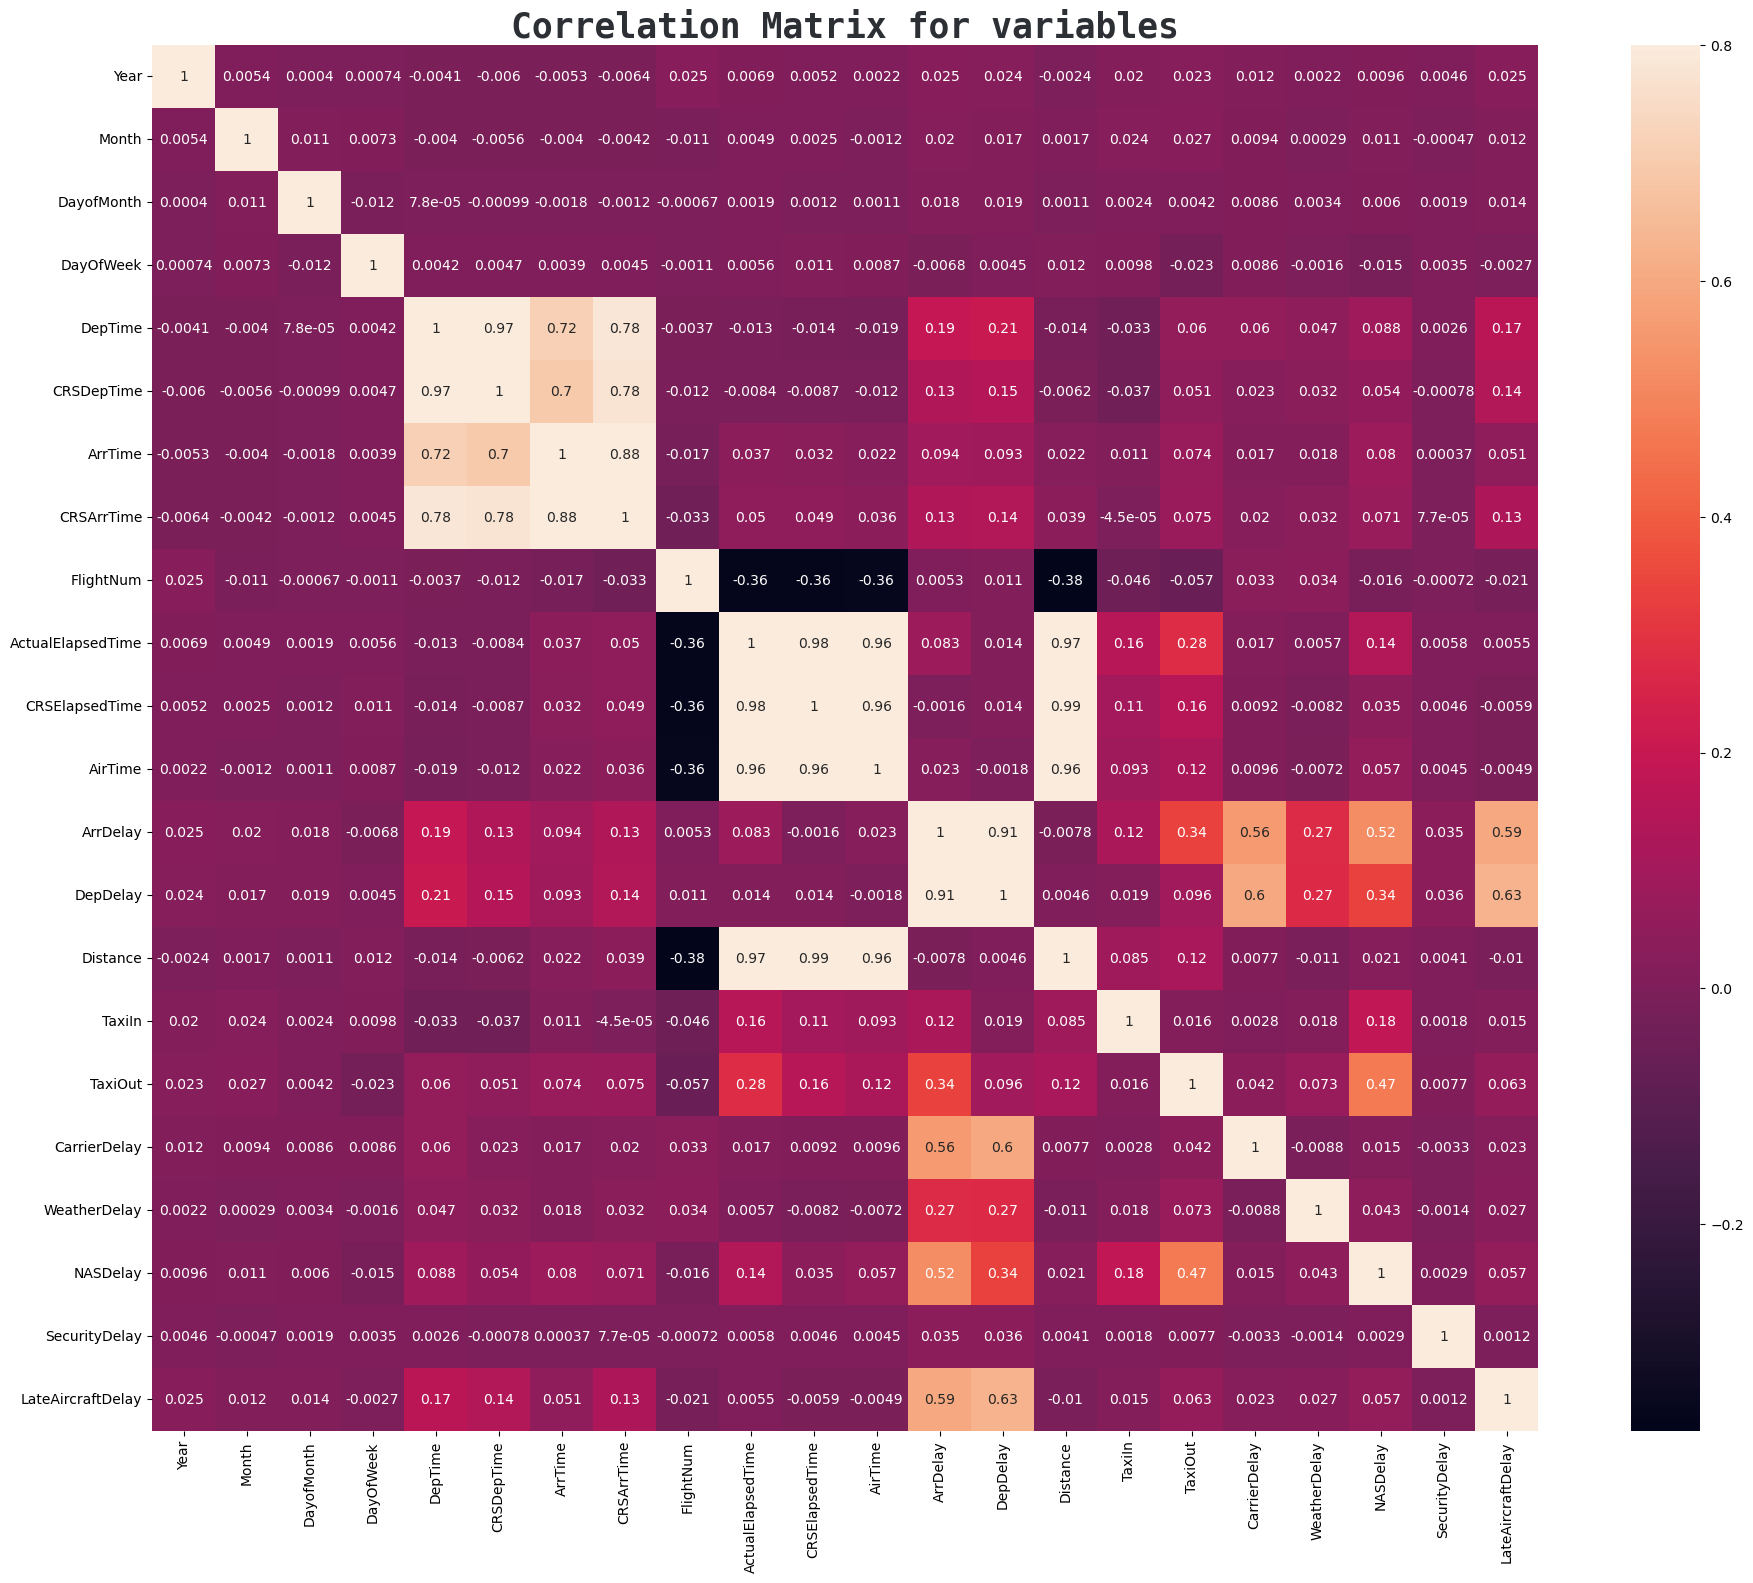

In [11]:
#Making a pearson Correlation matrix for the variables in the full_dataset using an sns heatmap
correlation_matrix = data_f.corr('pearson')

f, ax = plt.subplots(figsize=(24, 18))
sns.heatmap(correlation_matrix, annot=True, vmax=.8, square=True)
ax.set_title("Correlation Matrix for variables",
                color='#2c2f34',
                family = 'monospace',
                size = 25,
                weight = 'bold')
plt.show()


In [12]:
data_f.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn                 int64
TaxiOut                int64
CarrierDelay           int64
WeatherDelay           int64
NASDelay               int64
SecurityDelay          int64
LateAircraftDelay      int64
type                  object
manufacturer          object
issue_date            object
model                 object
status                object
aircraft_type         object
engine_type           object
year                  object
Route         

In [13]:
#Converting Month to a string type object
data_f['Month'] = data_f['Month'].astype(str)
data_f['DayOfWeek'] = data_f['DayOfWeek'].astype(str)

In [14]:
#Choosing the features and assigning them to specific categories
features = ['TaxiOut',  
            'Route', 
            'engine_type', 
            'Month', 
            'Distance',
           'CRSDepTime']

# Assigning categorical features related to ArrDelayStatus
categorical_features = ['Route', 
                        'engine_type',
                        'Month']

# Assigning numerical features related to ArrDelayStatus
numerical_features = ['Distance',
                      'CRSDepTime',
                     'TaxiOut']


In [15]:
# Making a numerical pipeline to scale and impute numerical data
numerical_transformer = Pipeline(steps=[ ('imputer', SimpleImputer()), ('scaler', StandardScaler())])
# Making a categorical pipeline to onehot encode and impute categorical data
categorical_transformer = Pipeline(steps=[ ('imputer', SimpleImputer()), ('onehot', OneHotEncoder(handle_unknown='ignore'))])
# Combining numerical transformer and categorical transformer pipelines
data_transformer = ColumnTransformer(transformers=[('categorical', categorical_transformer, categorical_features),
                                                   ('numerical', numerical_transformer, numerical_features)])

In [16]:
X = data_f[features]
y = data_f.DelayStatus

In [17]:
y

0           Delayed
1            Ontime
2            Ontime
3            Ontime
4            Ontime
             ...   
10209562    Delayed
10209563    Delayed
10209564    Delayed
10209565    Delayed
10209566    Delayed
Name: DelayStatus, Length: 10204274, dtype: object

In [18]:
# Creating a logistic regression pipe line 
model_lr = Pipeline(steps=[('data_transformer', data_transformer), ('model_lr', LogisticRegression(max_iter=10000))])

In [19]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)

In [20]:
# Doing a Grid Search Cross Validation on the logistic regression model
# Setting the grid search parameters
param_grid = {'data_transformer__numerical__imputer__strategy': ['mean', 'median'],
              'data_transformer__categorical__imputer__strategy': ['constant','most_frequent']}
grid_lr = GridSearchCV(model_lr, param_grid=param_grid, n_jobs=5)

# Fitting the tuned model using the X and y training datasets
grid_lr.fit(X_train, y_train);

In [21]:
data_f

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year,Route,DelayStatus
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13,0,0,0,0,0,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999,ATL - PHX,Delayed
1,2006,1,11,3,1913.0,1912,2326.0,2331,US,9,N657AW,193.0,199.0,172.0,-5.0,1.0,PHX,ORD,1440,5,16,0,0,0,0,0,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999,PHX - ORD,Ontime
2,2006,1,12,4,2355.0,2359,121.0,131,US,374,N657AW,86.0,92.0,58.0,-10.0,-4.0,LAS,OAK,407,5,23,0,0,0,0,0,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999,LAS - OAK,Ontime
3,2006,1,12,4,724.0,729,1017.0,1019,US,182,N657AW,233.0,230.0,200.0,-2.0,-5.0,ORD,PHX,1440,24,9,0,0,0,0,0,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999,ORD - PHX,Ontime
4,2006,1,12,4,1305.0,1300,1848.0,1850,US,570,N657AW,223.0,230.0,207.0,-2.0,5.0,PHX,TPA,1788,5,11,0,0,0,0,0,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999,PHX - TPA,Ontime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10209562,2005,7,28,4,2100.0,2100,12.0,11,OO,6580,N753SW,132.0,131.0,112.0,1.0,0.0,DEN,IAH,861,5,15,0,0,0,0,0,Corporation,BOEING,12/03/1999,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999,DEN - IAH,Delayed
10209563,2005,7,28,4,1745.0,1715,1900.0,1828,OO,6619,N753SW,75.0,73.0,65.0,32.0,30.0,DEN,ABQ,349,5,5,32,0,0,0,0,Corporation,BOEING,12/03/1999,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999,DEN - ABQ,Delayed
10209564,2005,7,28,4,1920.0,1858,2029.0,2015,OO,6619,N753SW,69.0,77.0,54.0,14.0,22.0,ABQ,DEN,349,8,7,0,0,0,0,0,Corporation,BOEING,12/03/1999,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999,ABQ - DEN,Delayed
10209565,2005,7,28,4,1506.0,1429,1529.0,1509,OO,6641,N753SW,23.0,40.0,17.0,20.0,37.0,DEN,COS,72,6,0,20,0,0,0,0,Corporation,BOEING,12/03/1999,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999,DEN - COS,Delayed


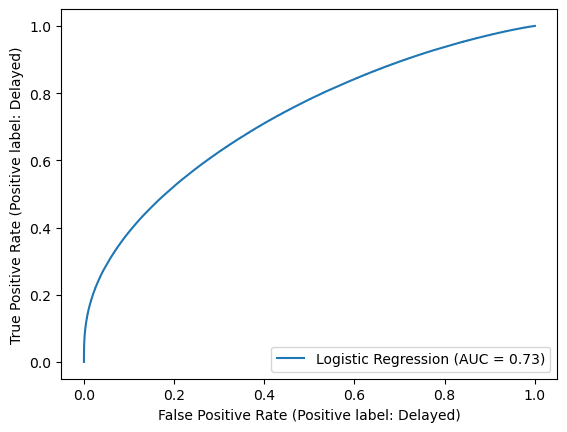

In [22]:
ax = plt.gca()

# Plotting the logistic regression ROC curve
metrics.RocCurveDisplay.from_estimator(grid_lr, X_test, y_test, ax=ax, pos_label='Delayed', name='Logistic Regression')

plt.show()

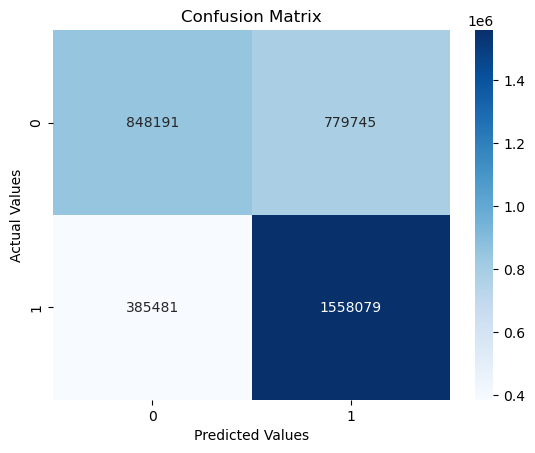

In [23]:
y_pred = grid_lr.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True, fmt='d', cmap = 'Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

plt.show()